# Выявление закономерностей, определяющих успешность игр

**Описание проекта**   

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

# Цель проекта: выявить факторы, позволяющие определить наиболее популярный продукт и спланировать рекламные кампании

# 1. Общая информация по файлу

Импортируем необходимые библиотеки и читаем данные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

Выведем первые строки датасета для ознакомления

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Создадим функцию для вывода общей информации по датафрейму: размер, типы данных и количество пропусков в солбцах, гистограммы по столбцам, наименования столбцов отдельно

In [4]:
def describe(df: pd.DataFrame):
    display(f'Общая информация: {df.shape}')
    display()
    display(df.info())
    display()
    df.hist(figsize=(10, 15))
    plt.show()
    display()
    display(df.describe().round())
    display(f'Названия столбцов: {df.columns}')

'Общая информация: (16715, 11)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

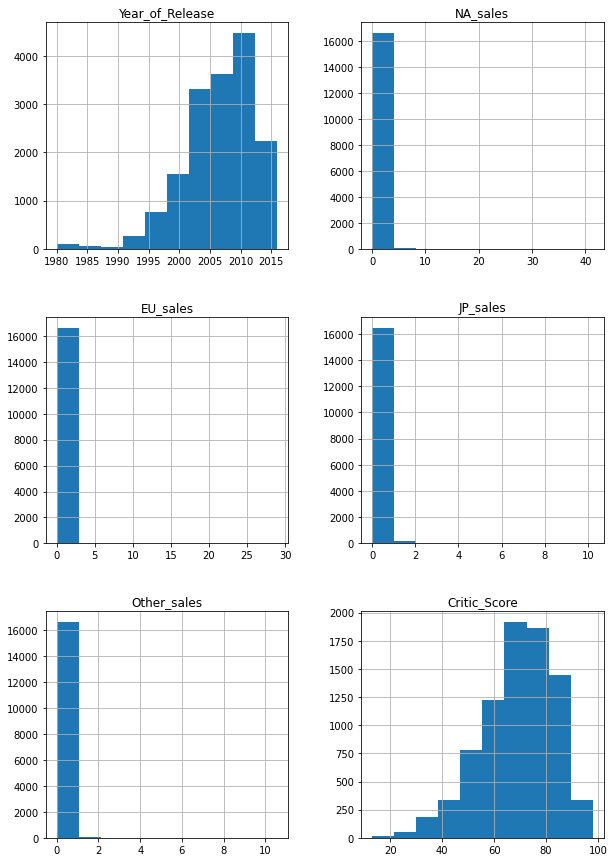

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.0,16715.0,16715.0,16715.0,16715.0,8137.0
mean,2006.0,0.0,0.0,0.0,0.0,69.0
std,6.0,1.0,1.0,0.0,0.0,14.0
min,1980.0,0.0,0.0,0.0,0.0,13.0
25%,2003.0,0.0,0.0,0.0,0.0,60.0
50%,2007.0,0.0,0.0,0.0,0.0,71.0
75%,2010.0,0.0,0.0,0.0,0.0,79.0
max,2016.0,41.0,29.0,10.0,11.0,98.0


"Названия столбцов: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',\n       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],\n      dtype='object')"

In [5]:
describe(df)

**После ознакомления с массивом данных можно сделать следующие выводы:**
- необходимо:
 - переименовать столбцы переводом в нижний регистр;
 - типы данных в Year_of_Release и User_Score заменить на целочисленные;
 - исследовать и при необходимости заполнить пропуски в Critic_Score, User_Score, Year_of_Release и Rating;
 - посмотреть и, возможно, удалить строки с нулевыми значениями в Genre и Name;
- по гистограммам видно, что больше всего данных за период с 2003 по 2010 год, оценки критиков в основном от 60 до 80 баллов.  
Данные нуждаются в предобработке, категоризации и более подробном изучении.

# 2. Подготовка данных

Переименуем столбцы

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим, совпадают ли пропуски в наименовании игр и их жанрах.

In [7]:
df.query('name.isna() or genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Изучим строки с пропусками в столбце года выпуска:

In [8]:
df['year_of_release'].isna().mean().round(3)

0.016

In [9]:
df.loc[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Видим, что доля строк с пропусками в годе выпуска довольно мала - 1.6%. Можно удалить эти строки, а заодно и 2 строки с пропусками в имени и жанре.

In [10]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])
df = df.reset_index(drop=True)
df.shape

(16444, 11)

Изменим тип данных по годам выпуска на целочисленный.

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

Исследуем пропуски по столбцам с оценками и рейтингом, выведем долю пропусков и значения по каждому столбцу.

In [12]:
df[{'critic_score', 'user_score', 'rating'}].isna().mean().round(2)

user_score      0.40
rating          0.41
critic_score    0.51
dtype: float64

Доля пропусков по столбцам с оценками и рейтингом от 40 % до 50 %. Далеко не все пользователи ставят оценку игре, т.к. для этого часто нужно авторизоваться или зарегистрироваться. Многие игры, возможно, еще не успели попасть в поле зрение критиков и получить свою оценку.

In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Исследуем типы значений в столбце с оценкой пользователей:

In [14]:
df['user_score'].isna().sum()

6605

In [15]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.5       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Довольно много оценок `tbd`. "TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято."  
Возможно, пользователь начал выставлять оценку игре, но не завершил процесс правильным образом, не сохранил вовремя или не авторизовался для выставления оценки. Пока пользователь не определился с решением, будем считать, что оценки нет. То есть приравняем `tbd` к `nan`. И изменим тип данных на float для удобства проведения дальнейших расчетов.

In [16]:
df['user_score'] = df['user_score'].fillna(np.nan)
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'])

In [17]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [18]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Посмотрим, какие значения содержатся в рейтинге ESRB. Должны быть:
- «EC» («Early childhood») — «Для детей младшего возраста»;
- «E» («Everyone») — «Для всех»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»; 
- «M» («Mature») — «Для взрослых»;
- «AO» («Adults Only 18+») — «Только для взрослых».

In [19]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

После поиска недостающих обозначений выяснилось:
- "K-A": Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес. Позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т;
- «RP» («Rating Pending»“) — «Рейтинг ожидается».  
Заменим К-А на Е.

In [20]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Добавим столбец с суммарными продажами по всем регионам:

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Выводы:**  
В ходе предобработки были удалены строки с пропусками в наименовании и жанре игр (2 строки) и 1.6 % строк с пропусками по году выпуска игр. Тип значений года выпуска изменен на int.  
Пропуски в оценках критиков, пользователей и рейтинге (40-50 %) за неимением корректной замены решено оставить. Значения в столбцах с рейтингами приведены к float. Значение tbd в рейтинге пользователей изменено на nan. А устаревшее значение "K-A" в рейтинге игр заменено на новый вариант "Е".  
Добавлен новый столбец с суммой продаж по всем регионам.

# 3. Исследовательский анализ данных

## 3.1. Анализ по годам выпуска игр

Сгруппируем данные по выпуску игр по годам и визуализируем их на графике.

In [23]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

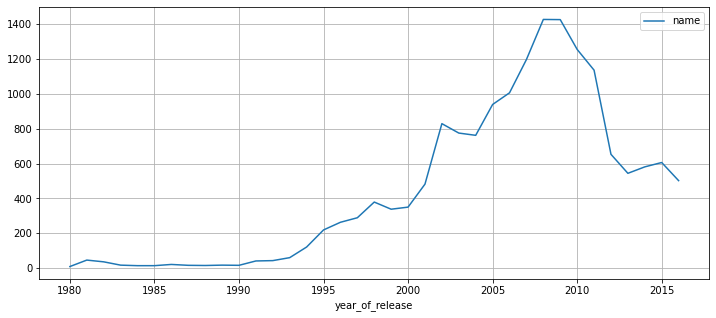

In [24]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, figsize=(12, 5))

Видим, что с 2002 по 2011 наблюдался ощутимый рос выпуска игр. В последние годы с 2012 по 2016 видов игр выпускается в 2 раза меньше.

Оценим выпуск видеоигр по разным игровым платформам.

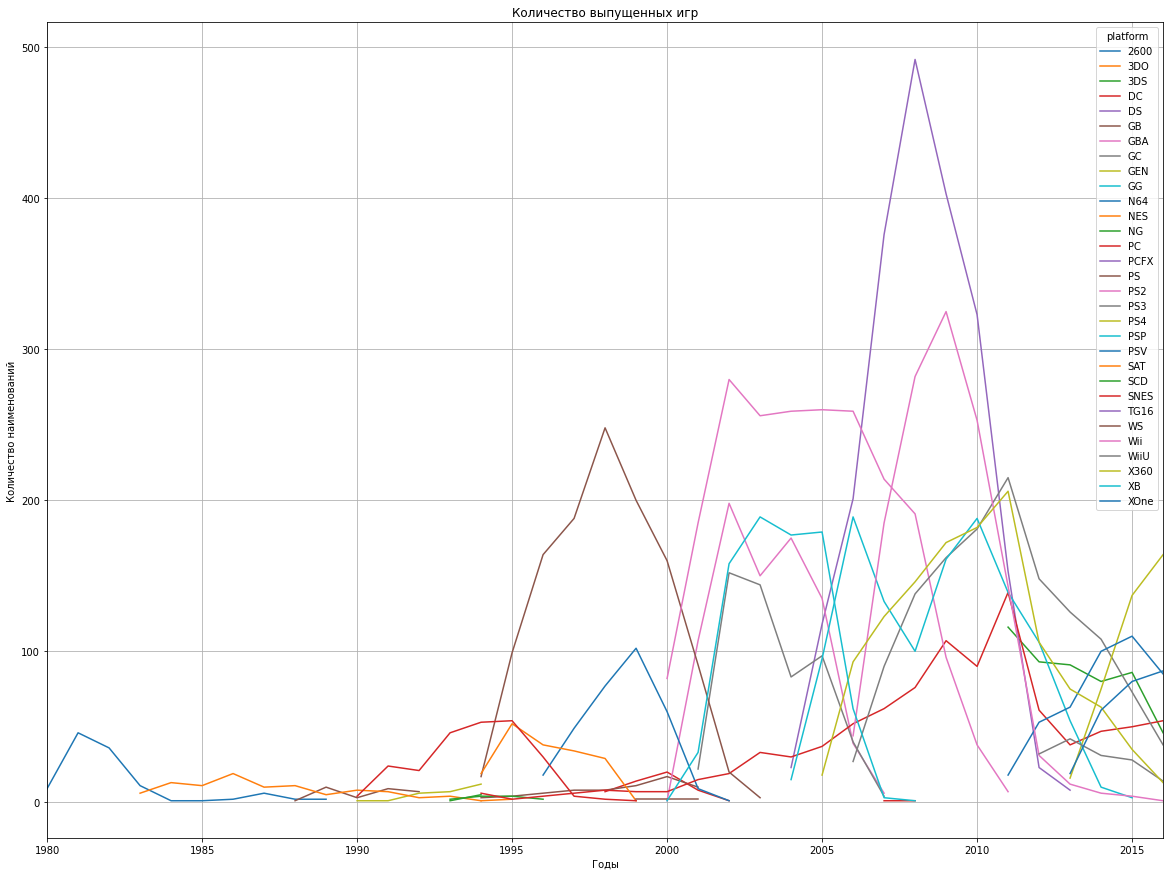

In [25]:
df.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count').plot(grid=True, figsize=(20, 15))
plt.title('Количество выпущенных игр')
plt.xlabel('Годы')
plt.ylabel('Количество наименований')
plt.xlim(1980, 2016)
plt.show()

In [26]:
df.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получили данные по 31 платформе. Видим, что не все платформы "дожили" до 2016 года. Средняя продолжительность жизни платформы от 5 до 10 лет. Есть и платформы долгожители, например, РС. Видимо, смена связана с развитием технологий. С 1995 по 2000 "бум" по одним платформам, а с 2002 по 2012 уже по другим. После 2012 похоже наступило пресыщение или опять сменились технологии. Игр стало меньше почти в 2 раза, появились новые платформы.  Далеко не все платформы выпускают игры до 2016 года включительно. Посмотрим данные по платформам за последние 3 года (2014-2016). Дальнейшую динамику будем отслеживать по ним.  

## 3.2. Анализ продаж с 2014 года

До этого мы сравнивали выпуск количества наименований игр по годам. Теперь сравним продажи по платформам с 2014 года.

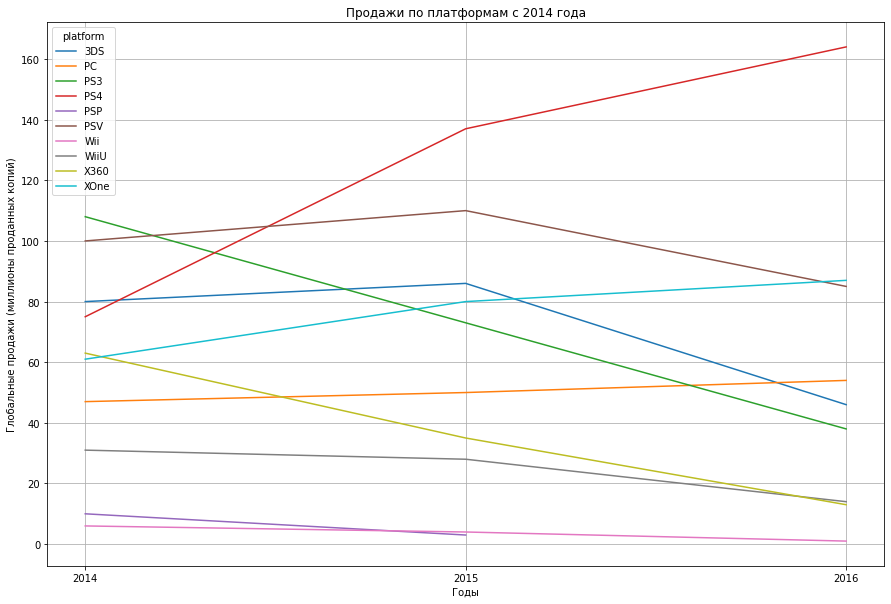

In [27]:
df.query('year_of_release >= 2014').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count').plot(grid=True, figsize=(15, 10))
plt.title('Продажи по платформам с 2014 года')
plt.xlabel('Годы')
plt.ylabel('Глобальные продажи (миллионы проданных копий)')
plt.xticks(range(2014,2017))
plt.show()

Видим, что 3 платформы: PS4, XOne и PC демонстрируют рост продаж за последние 3 года. Лидером по продажам при этом является PS4. Платформы Wii, WiiU ослабляю позиции плавно, но их продажи и так не высоки. PSP с 2015 по 2016 вообще ничего не выпускает. PSV и 3DS были на пике в 2015 году рассматриваемого периода, но продажи пока в "плюсе". Динамика продаж по PS3 и X360 существенно ухудшается.

In [28]:
data = df.query("year_of_release >= 2014 and platform == ['PS4', 'XOne', 'PC']")
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16372,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16374,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16389,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


Ограничим датасет данными по 3-и наиболее успешным платформам за 3 года, предшествующих анализу. Построим диаграмму размаха по глобальным продажам игр в разбивке по этим платформам.

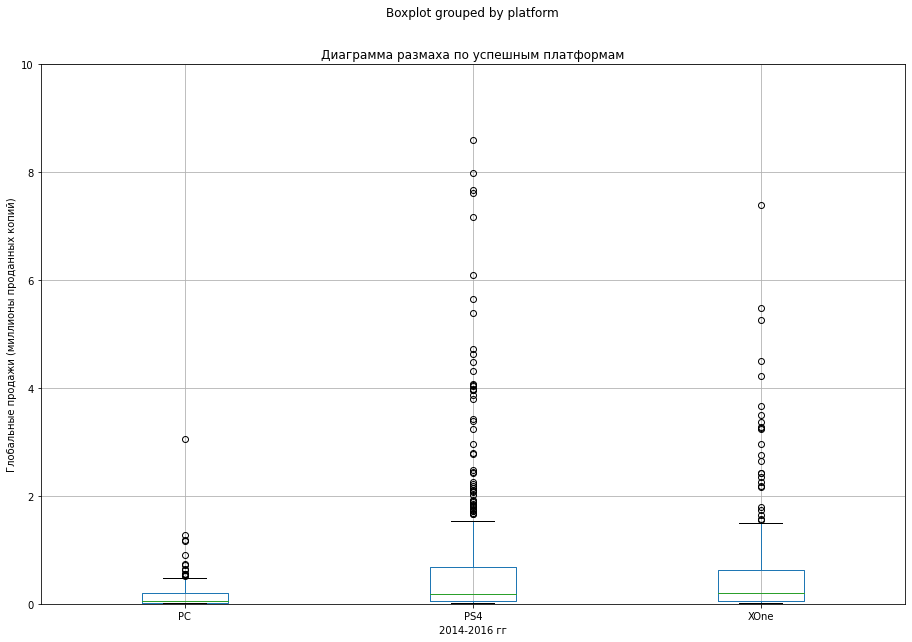

In [29]:
data.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title('Диаграмма размаха по успешным платформам')
plt.xlabel('2014-2016 гг')
plt.ylabel('Глобальные продажи (миллионы проданных копий)')
plt.ylim(0, 10)
plt.show()

Для более точного цифрового представления опишем платфлрмы методом describe(). Очевидно, что рассматривать далее стоит PS4 и XOne. Средние продажи у них примерно равны, как и квартильные значения. Большая часть продаж в промежутке от 0.05-0.06 млн. копий до 0.63-0.69 млн. копий. Средние продажи за 3 года 0.62 XOne и 0.77 PS4. Средние продажи у PS4 выше за счет большего количества и размаха выбросов. Видимо, какие-то игры этой платформы продаются лучше большинства других. Максимум продаж PS4 в 2 раза больше, чем у конкурента. За счет этого PS4 явно лидирует, что видно и по диаграммам, построенным ранее.

In [30]:
data.query('platform == "PS4"').describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,376.00,376.00,376.00,376.00,376.00,237.00,242.00,376.00
mean,2015.24,0.26,0.35,0.04,0.12,72.16,6.83,0.77
std,0.76,0.58,0.82,0.07,0.26,12.21,1.40,1.61
min,2014.00,0.00,0.00,0.00,0.00,19.00,1.50,0.01
25%,2015.00,0.00,0.00,0.00,0.00,66.00,6.20,0.06
50%,2015.00,0.05,0.07,0.02,0.02,73.00,7.10,0.18
75%,2016.00,0.24,0.28,0.05,0.10,80.00,7.88,0.69
max,2016.00,6.03,6.31,0.49,2.38,97.00,9.20,14.63


In [31]:
data.query('platform == "XOne"').describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,228.00,228.00,228.00,228.00,228.00,155.00,165.00,228.00
mean,2015.11,0.36,0.20,0.00,0.05,73.79,6.59,0.62
std,0.80,0.63,0.37,0.01,0.10,12.25,1.38,1.05
min,2014.00,0.00,0.00,0.00,0.00,20.00,1.60,0.01
25%,2014.00,0.03,0.02,0.00,0.00,66.50,5.80,0.05
50%,2015.00,0.10,0.07,0.00,0.02,76.00,6.80,0.20
75%,2016.00,0.35,0.21,0.00,0.05,83.00,7.60,0.63
max,2016.00,4.59,2.19,0.04,0.68,97.00,9.20,7.39


## 3.3. Анализ зависимости продаж от отзывов

Исследуем, как отзывы критиков и пользователей влияют на продажи наиболее популярной платформы PS4. Выделим ее данные в отдельный датасет за актуальный период.

In [32]:
pp = data.query('platform == "PS4"')

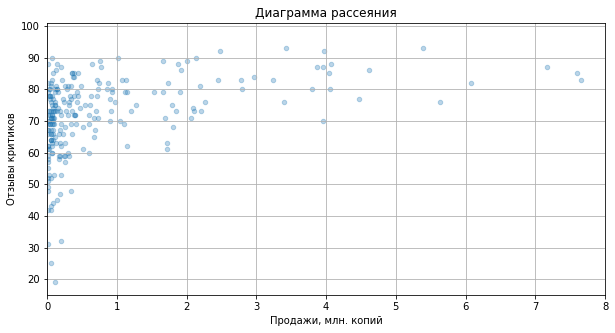

In [33]:
pp.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, grid=True, figsize=(10, 5))
plt.title('Диаграмма рассеяния')
plt.xlabel('Продажи, млн. копий')
plt.ylabel('Отзывы критиков')
plt.xlim(0, 8)
plt.show()

In [34]:
pp['total_sales'].corr(pp['critic_score'])

0.40266141068104083

И диаграмма рассеяния, и коэффициент корреляции говорят о не слишком значительном влиянии отзывов критиков на рост продаж игр.

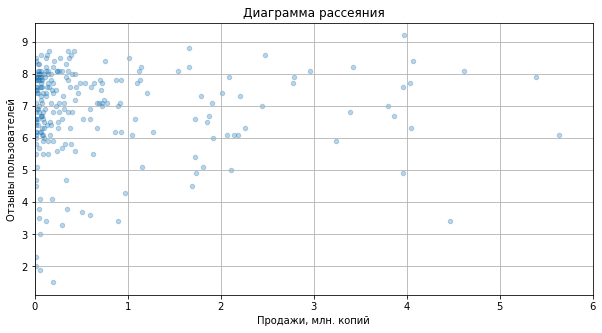

In [35]:
pp.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, grid=True, figsize=(10, 5))
plt.title('Диаграмма рассеяния')
plt.xlabel('Продажи, млн. копий')
plt.ylabel('Отзывы пользователей')
plt.xlim(0, 6)
plt.show()

In [36]:
pp['total_sales'].corr(pp['user_score'])

-0.040131589472697356

Корреляция зависимости продаж от оценки пользователей очень слабая и отрицательная - зависимость отсутствует. По диаграмме рассеяния также видим, что большинство игр с высокими отзывами находятся в зоне продаж до 0.5 млн. копий.

## 3.4. Сравнение продаж по платформам

Сравним полученные результаты с зависимостями продаж игр на других платформах от мнения критиков и пользователей. Будем сравнивать данные за актуальный период.

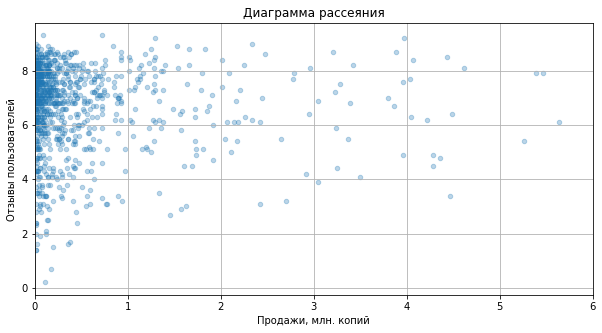

In [37]:
all_platform = df.query('year_of_release >= 2014')
all_platform.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, grid=True, figsize=(10, 5))
plt.title('Диаграмма рассеяния')
plt.xlabel('Продажи, млн. копий')
plt.ylabel('Отзывы пользователей')
plt.xlim(0, 6)
plt.show()

In [38]:
all_platform['total_sales'].corr(all_platform['user_score'])

-0.013070305002484585

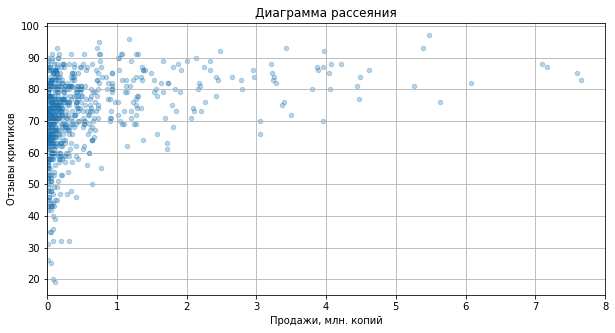

In [39]:
all_platform.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, grid=True, figsize=(10, 5))
plt.title('Диаграмма рассеяния')
plt.xlabel('Продажи, млн. копий')
plt.ylabel('Отзывы критиков')
plt.xlim(0, 8)
plt.show()

In [40]:
all_platform['total_sales'].corr(all_platform['critic_score'])

0.328105086966363

Видим больший разброс в значениях, но в целом зависимости не наблюдается, так же, как и в предыдущих графиках.

## 3.5. Сравнение по жанрам

Сравним продажи за весь период по жанрам и выделим наиболее продаваемые.

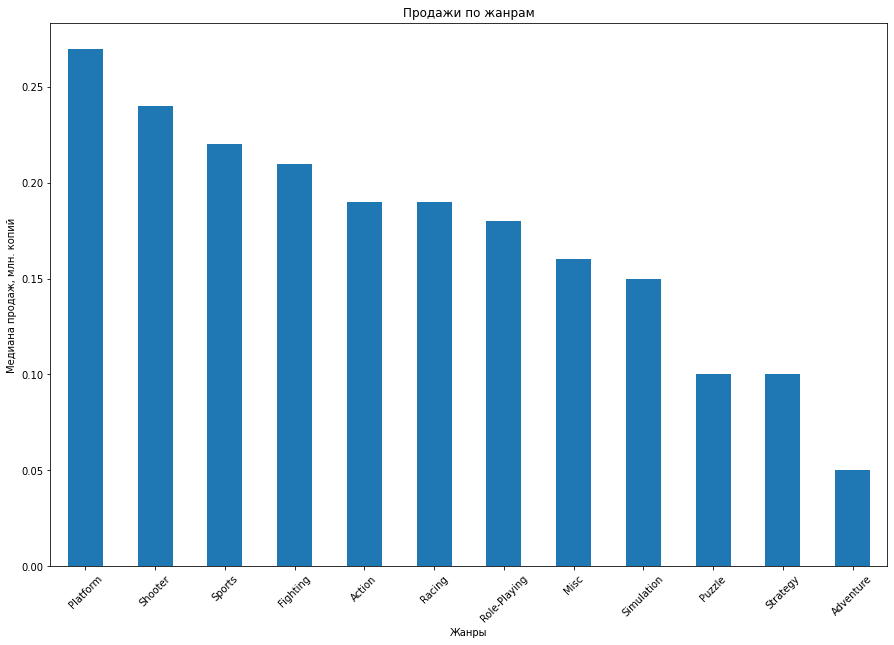

In [41]:
df.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', rot=45, figsize=(15, 10))
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Медиана продаж, млн. копий')
plt.show()

Видим, что если сравнивать жанры всего датасета, лидируют platform, shooter, sports. Корректнее будет сравнить жанры за последние 3 года. Сменились платформы, технологии, вместе с ними могли уйти старые или появиться новые жанры.

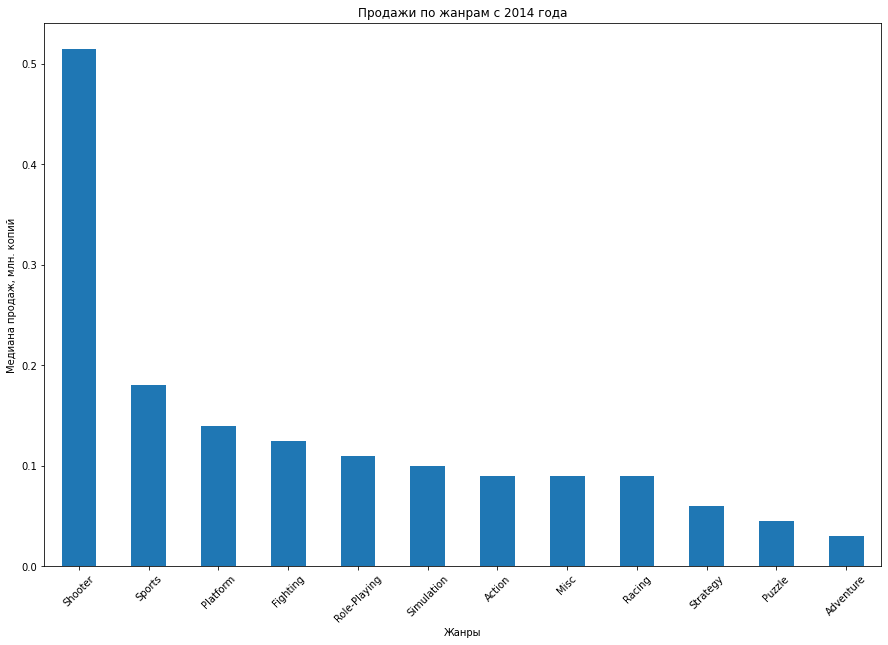

In [42]:
all_platform.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', rot=45, figsize=(15, 10))
plt.title('Продажи по жанрам c 2014 года')
plt.xlabel('Жанры')
plt.ylabel('Медиана продаж, млн. копий')
plt.show()

Как видим, платформеры сдали позиции и уступили место стрелялкам. Топ-3 все тот же, но шутеры лидируют с примерно двойным перевесом. Игры на реакцию, позволяющие "отключить мозг". Люди сбрасывают стресс. А вот в отстающих все те же стратегии, паззлы и приключенческие игры. Видимо, они менее динамичны, требуют больше времени и раздумий. 

**Вывод:**  
В данной части исследования мы проанализировали выпуск игр по годам, увидели на графиках периоды игрового "бума", когда развитие технологий повлияло на выпуск огромного количества игр (2002-2012). Поняли, что сейчас ситуация на рынке игр изменилась. И решили проводить анализ за последние 3 года.  
Выделили 3-х лидеров продаж - платформы: PS4, XOne и PC. Из них самая прибыльная платформа PS4, немного уступает XOne и похоже сдает позиции PC.  
Анализ зависимости продаж от отзывов по наиболее популярной платформе PS4 показал слабо положительную корреляцию от отзывов критиков и совсем несущественную отрицательную от отзывов пользователей.  
Сравнение продаж по платформам подтвердило ранее выявленных лидеров среди платформ по продажам и количеству игр. Вот здесь видна прямая взаимосвязь, чем больше игр, тем больше продажи.
Сравнение по жанрам позволило выявить топ-3 наиболее продаваемых жанров и уточнить их распределение в рассматриваемом периоде:  shooter, sports, platform.

# 4. Портрет пользователя каждого региона

Для пользователя каждого региона (NA, EU, JP):
- определим самые популярные платформы (топ-5);
- определим самые популярные жанры (топ-5);
- проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для пользователей Северной Америки наиболее популярными(продаваемыми) с 2014 года являются платформы:

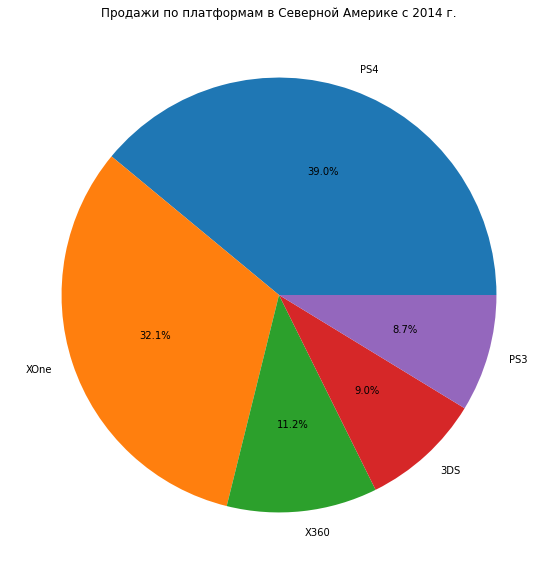

In [43]:
all_platform.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', label ='', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Продажи по платформам в Северной Америке с 2014 г.')
plt.show()

Безусловный лидер PS4, чуть меньше продаж по XOne, затем X360, чуть отстают от нее 3DS и PS3.

Исследуем предпочтения европейских игроманов за последние годы:

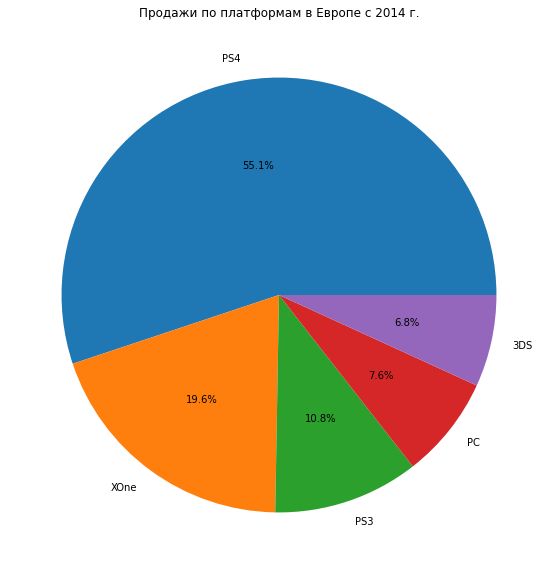

In [44]:
all_platform.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', label ='', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Продажи по платформам в Европе с 2014 г.')
plt.show()

Здесь  та же картина по двум лидерам, но PS3 заменила X360 на 3-ем месте. РС и 3DS - замыкают пятерку.

Исследуем продажи по платформам в Японии с 2014 года:

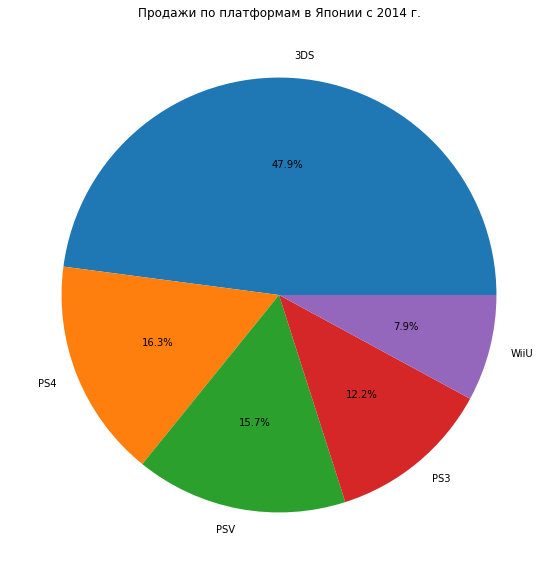

In [45]:
all_platform.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', label ='', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Продажи по платформам в Японии с 2014 г.')
plt.show()

Японцы предпочитают 3DS, PS4, PSV, PS3, а на 5 месте WiiU. А игры платформ PC и Xone, Х360 не столь популярны на востоке. Исследуем доли продаж.

In [46]:
print('Доля продаж Северной Америки:', ((df['na_sales'].sum()/df['total_sales'].sum())*100).round(2))
print('Доля продаж Европы:', ((df['eu_sales'].sum()/df['total_sales'].sum())*100).round(2))
print('Доля продаж Японии:', ((df['jp_sales'].sum()/df['total_sales'].sum())*100).round(2))

Доля продаж Северной Америки: 49.25
Доля продаж Европы: 27.22
Доля продаж Японии: 14.64


Доли продаж всех стран за весь период с 1980 года сопоставимы с их соотношением по площади и количеству жителей. Посмотрим на те же доли от продам с 2014 года:

In [47]:
print('Доля продаж Северной Америки с 2014 года:', ((all_platform['na_sales'].sum()/all_platform['total_sales'].sum())*100).round(2))
print('Доля продаж Европы с 2014 года:', ((all_platform['eu_sales'].sum()/all_platform['total_sales'].sum())*100).round(2))
print('Доля продаж Японии с 2014 года:', ((all_platform['jp_sales'].sum()/all_platform['total_sales'].sum())*100).round(2))

Доля продаж Северной Америки с 2014 года: 38.94
Доля продаж Европы с 2014 года: 37.11
Доля продаж Японии с 2014 года: 12.76


Вот это неожиданность: Америка и Европа практически равны по долям продаж. В СА спрос упал, в Европе вырос. Япония стала покупать немного меньше. Видимо этим объясняется лидерство платформ в общем рейтинге: PS4 во всех трех регионах, XOne популярна в Европе и СА - а это почти 80% рынка.

Возможно, исследование по жанрам дополнит ситуацию.

In [49]:
na = all_platform.groupby('genre')['na_sales'].sum().nlargest()

In [50]:
eu = all_platform.groupby('genre')['eu_sales'].sum().nlargest()

In [51]:
jp = all_platform.groupby('genre')['jp_sales'].sum().nlargest()

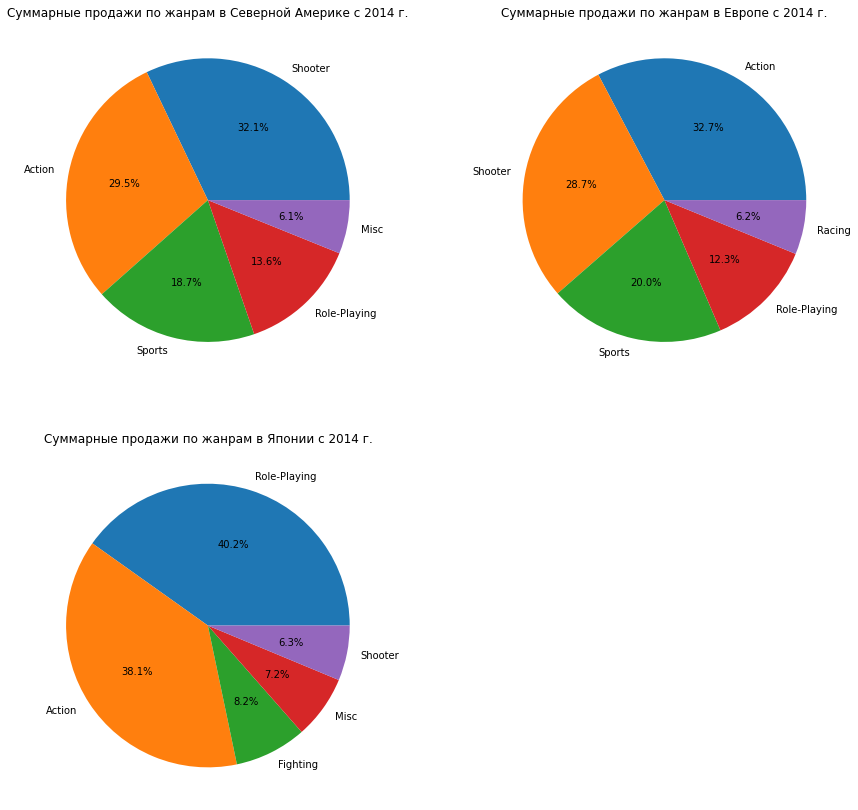

In [52]:
fig = plt.figure(figsize=(15, 30))

ax_1 = fig.add_subplot(4, 2, 1)
ax_2 = fig.add_subplot(4, 2, 2)
ax_3 = fig.add_subplot(4, 2, 3)

ax_1.pie(na, labels=na.index, autopct='%1.1f%%', normalize=True)
ax_2.pie(eu, labels=eu.index, autopct='%1.1f%%', normalize=True)
ax_3.pie(jp, labels=jp.index, autopct='%1.1f%%', normalize=True)
ax_1.set_title('Суммарные продажи по жанрам в Северной Америке с 2014 г.')
ax_2.set_title('Суммарные продажи по жанрам в Европе с 2014 г.')
ax_3.set_title('Суммарные продажи по жанрам в Японии с 2014 г.')

plt.show()

Жанры в СА и Европе схожи по продаваемости. По сумме продаж лидируют жанры shooter и action примерно в равных долях, далее идут sports и role-playing.  Японцы же предпочитают ролевые игры, экшн, бои, аркады, а популярные на западе стрелялки лишь на 5-м месте. 

Проверим, как  рейтинг ESRB влияет на продажи в отдельном регионе:

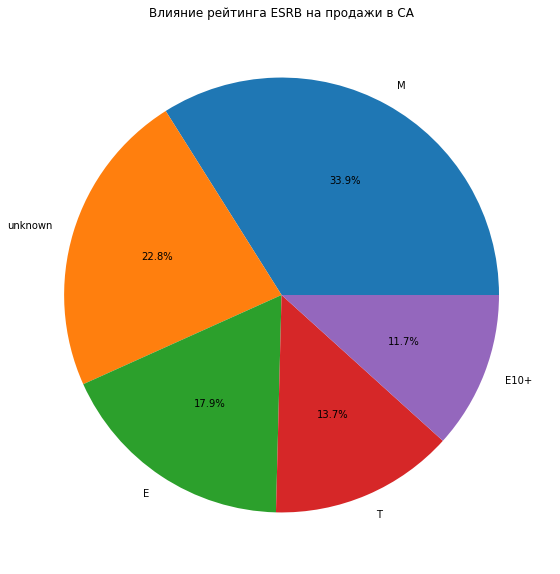

In [53]:
all_platform.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', label ='', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Влияние рейтинга ESRB на продажи в СА')
plt.show()

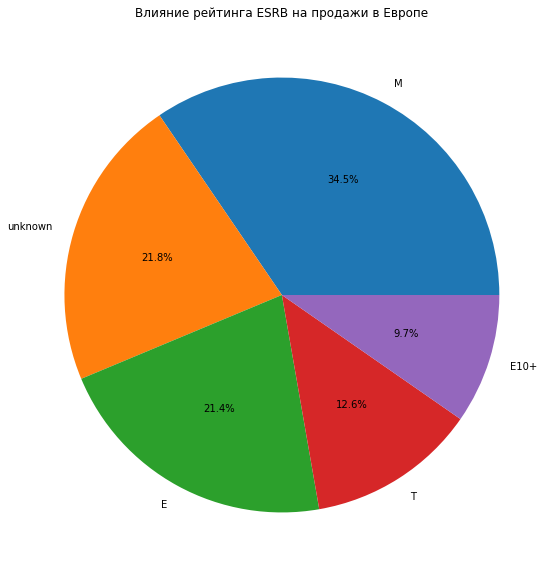

In [54]:
all_platform.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', label ='', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.show()

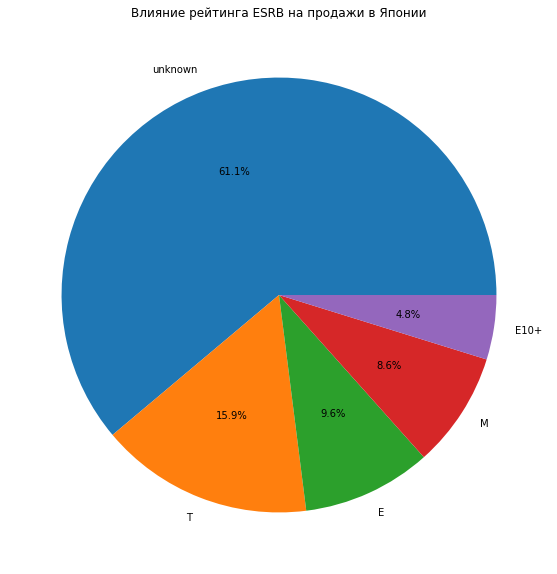

In [55]:
all_platform.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', label ='', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.show()

Здесь опять четко прослеживается разница между восточными и западными игроками. В Европе и СА популярны игры для взрослых, потом игры без определенной категории, затем для всех возрастов, подростковые и от 10 лет. Около 20 % продаж приходится на игры без жанра... Стоит выяснить в дальнейшем - что это за игры, возможно ассоциация прошла мимо них. А продажи велики.
А вот в Японии 60% рынка продаж приходится на эти неизвестного жанра игры. Около 16% - игры для тинейджеров, потом для всех, для взрослых и от 10 лет по убыванию популярности.

**Вывод:**  
Исследование по регионам показало наличие разницы в предпочтениях пользователей западных и восточных стран. Платформы, лидирующие по продажам в Европе и Америке, менее популярны в Японии (за исключением лидера PS4 - безоговорочно популярная платформа). Тем не менее лидируют  по общим продажам платформы, входящие в топ-5 западных стран. Что объясняется превалирующей долей продаж в этих странах (80 % общего рынка).  
Жанры в СА и Европе тоже примерно схожи по продаваемости. По сумме продаж лидируют жанры shooter и action, далее идут sports и role-playing. Аркады misc на 5 месте в СА, а вот в Европе больше любят гонки. Японцы же предпочитают ролевые игры, экшн, бои, аркады и стрелялки лишь на 5-м месте.  
Судя по рейтингу ESRB наиболее продаваемы на западе игры для взрослых. 20% продаж приходится на игры, не вошедшие в рейтинг. 3-5 места занимают игры для всех, подростковые и от 10 лет соответственно. А вот в Японии около 60% продаваемых игр - вне рейтинга ESRB. Возможно, там свои рейтинги? Там ведь есть CERO. Подростковые игры обгоняют игры для всех возрастов, для взрослых и от 10 лет.

 # 5. Проверка гипотез

## Гипотеза №1: средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые

Нулевая гипотеза - H_0: средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.
Альтернативная гипотеза - Н_1: средние пользовательские рейтинги платформ Xbox One (XOne) и PC не равны.  

Для определения уровня значимости оценим объем сравниваемых выборок. Для этого выберем значения рейтинга по каждой платформе, не являющиеся nan. Нужно учесть, что РС - платформа, продажи по которой зафиксированы с 1985 года, а XOne с 2013. Возьмем данные только за актуальный период.

In [56]:
Xone = all_platform.loc[(~all_platform['user_score'].isna())&(all_platform['platform'] == "XOne")]['user_score']
len(Xone)

165

In [57]:
PC = all_platform.loc[(~all_platform['user_score'].isna())&(all_platform['platform'] == "PC")]['user_score']
len(PC)

122

Так как объемы выборок больше 100 значений и отличаются по объему не сильно, критический уровень статистической значимости назначим в 5%. И зададим параметр equal_var = False, так как выборки достаточно велики, но все же не равны между собой.

In [58]:
alpha = 0.05

results = st.ttest_ind(Xone, PC, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


В результате проверки, не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов по платформам XOne и PC.

## Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные

H_0: средний пользовательский рейтинг жанра экшн = среднему пользовательскому рейтингу спортивного жанра.
Н_1: средние пользовательские рейтинги жанров Action и Sports не равны.  

Для определения уровня значимости оценим объем сравниваемых выборок. Для этого создадим выборки со значениями рейтинга по каждому жанру.

In [59]:
action = all_platform.loc[(~all_platform['user_score'].isna())&(all_platform['genre'] == "Action")]['user_score']
len(action)

297

In [60]:
sports = all_platform.loc[(~all_platform['user_score'].isna())&(all_platform['genre'] == "Sports")]['user_score']
len(action)

297

Получилось две выборки равного объема. Примем уровень значимости alpha = 0.05. Так как мы не имеем представления о дисперсиях по выборкам, добавим параметр equal_var = False.

In [61]:
results = st.ttest_ind(action, sports, equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


При заданном уровне статистической значимости мы отвергаем нулевую гипотезу и предполагаем, что рейтинги жанров Action и Sports за актуальный период - разные.

# ВЫВОДЫ

Получив из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), я постаралась выявить определяющие успешность игры закономерности. Что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

**Данные были предварительно обработаны:**
- приведены к нижнему регистру наименования столбцов датасета;
- удалены строки с пропусками в наименовании и жанре игр (2 строки) и 1.6 % строк с пропусками по году выпуска игр;
- тип значений года выпуска изменен на int;
- значения в столбцах с рейтингами приведены к float;
- пропуски в оценках критиков, пользователей (40-50 %) за неимением корректной замены решено оставить;
- значение tbd в рейтинге пользователей изменено на nan;
- пропуски в значениях рейтинга ESRB заменены на категорию "unknown";
- устаревшее значение "K-A" в рейтинге игр заменено на новый вариант "Е";
- добавлен новый столбец с суммой продаж по всем регионам.

**В ходе анализа выпуска игр по годам и платформам** получены данные по 31 платформе. Сделан вывод, что средняя продолжительность жизни платформы от 5 до 10 лет. Есть и платформы долгожители, например, РС. Предполагаю, смена платформ связана с развитием технологий. После 2012 похоже опять сменились технологии. Игр стало меньше почти в 2 раза, появились новые платформы. Выделен **актуальный период для анализа и дальнейшего прогноза** по платформам - **последние 3 года (2014-2016)**.  
**Лидеры продаж за последние 3 года: PS4, XOne и PC.** При этом безоговорочно выделяется PS4. Платформы Wii, WiiU ослабляют позиции плавно, но их продажи и так не высоки. PSV и 3DS были на пике в 2015 году рассматриваемого периода, но продажи пока в "плюсе". Динамика продаж по PS3 и X360 существенно ухудшается.  
Анализ зависимости продаж по всем платформам и по наиболее популярной PS4 на выявил существенной корреляции от мнения пользователей и критиков.
Сравнение по жанрам позволило выявить **топ-3 наиболее продаваемых жанров** и уточнить их распределение в рассматриваемом периоде: **shooter, sports, platform**.

**Анализ продаж по регионам:**  
- Доля продаж Северной Америки с 2014 года: 38.94
- Доля продаж Европы с 2014 года: 37.11
- Доля продаж Японии с 2014 года: 12.76    
Основная доля продаж приходится на страны запада. Выявлены некоторые различия в предпочтениях игроков западных и восточных стран.

**Северная Америка**  
Безусловный лидер PS4, чуть меньше продаж по XOne, затем X360, чуть отстают от нее 3DS и PS3.
Жанр shooter немного опережает action, далее спорт, role-playing и аркады misc.
В СА популярны игры для взрослых, потом игры без определенной категории, затем для всех возрастов, подростковые и от 10 лет. Около 20 % продаж приходится на игры без жанра.  

**Европа**  Здесь  та же картина по двум лидерам, но PS3 заменила X360 на 3-ем месте. РС и 3DS - замыкают пятерку.
Здесь почти та же картина, что и в СА: только теперь экшен чуть популярнее стрелялок, спорт и ролевые на тех же позициях, а вместо аркад в Еропе предпочитают погонять.
В Европе та же ситуация с рейтингами, что и в СА.  

**Япония**  
Японцы предпочитают 3DS, PS4, PSV, PS3, а на 5 месте WiiU. А игры платформ PC и Xone, Х360 не столь популярны на востоке. 
По жанрам Япония тоже несколько отличается от западных стран. Здесь на первом месте Role-Playing, почти не уступает ему action. Затем бои и аркады, а shooter лишь на 5-м месте.  
А вот рейтинг ESRB для Японии похоже вообще не показателен - 60% рынка продаж приходится на игры, не ранжированные данной ассоциацией. Около 16% - игры для тинейджеров, потом для всех, для взрослых и от 10 лет по убыванию популярности.

В начале исследования были выдвинуты 2 гипотезы.  
**1 гипотеза: средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые** при заданном  критическом уровне статистической значимости в 5% **не была отвергнута**. Рейтинги этих двух платформ у пользователей с 2014 по 2016 гг. примерно одинаковы.  
**2 гипотеза: средние пользовательские рейтинги жанров Action и Sports разные** также **не отвергается**. При заданном уровне статистической значимости рейтинги жанров Action и Sports за актуальный период - разные.

В ходе проведенного анализа выявлена прямая зависимость продаж игр и их принадлежности к популярным, развивающимся на данный момент платформам. А также зависимость продаж по платформам от популярности жанров игр.  
А вот существенного влияния оценок пользователей и критиков на продаваемость игр не выявлено.  
В западных странах можно ориентироваться на рейтиг ESRB. Хотя стоит исследовать и другие возможные рейтинги (20% продаж игр вне рейтинга). В Японии же точно следует ориентироваться на рейтинги местных ассоциаций игроков (60% продаж вне ESRB рейтинга).

На основании проведенного анализа можно сделать следующие выводы на будущее:
- следует делать ставку на платформу PS4, как наиболее продаваемую и достаточно популярную во всех регионах;
- возможно, стоит продвигать и ракламировать игры платформ XOne и Х360 в Японии, при этом не отказываясь от продаж 3DS, PSV, PS3, WiiU;
- по всем платформам делать основной упор продаж на жанры shooter и action;
- продавать и рекламировать дальше популярные на западе жанры sports, role-playing, misc, racing;
- в Японии делать упор на Role-Playing, Action. И не забывать другие популярные жанры: бои, аркады и shooter;
- в СА и Европе ставить на продажи игр с рейтингом М, Е, Т и Е10+;
- при этом понять, к чему относятся 20% игр вне этого рейтинга;
- изучить более подробно, как проставляются рейтинги в Японии. Оценить продажи по рейтингам игр местных ассоциаций.